<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/PixelDrawer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

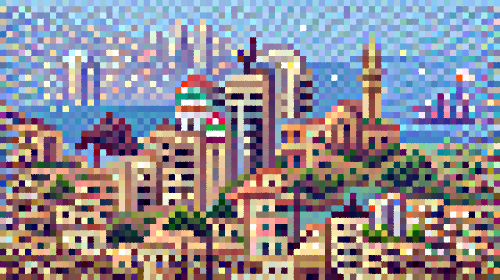

In [1]:
#@title Pixray PixelDraw demo
#
#@markdown This version of the notebook is setup to easily change
#@markdown from VQGAN to PixelDraw to render the image.
#
#@markdown (Beirut Skyline by <a href="https://twitter.com/gorillasu">Ahmad Moussa</a>)

import IPython
IPython.display.display(IPython.display.Image("https://user-images.githubusercontent.com/945979/129816218-c9bd6f96-a976-45da-ba2e-00c4b30a3c2e.png"))

In [2]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

# Add a gpu check
# (this can get better over time)
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, THIS IS PROBABLY NOT ENOUGH <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf pixray
  !git clone https://github.com/dribnet/pixray
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

output.clear()
import sys
sys.path.append("pixray")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
100%|███████████████████████████████████████| 244M/244M [00:06<00:00, 41.5MiB/s]
100%|███████████████████████████████████████| 338M/338M [00:15<00:00, 22.6MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:07<00:00, 49.5MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Beirut Skyline. #pixelart']
Using seed: 4855899722347500878 527488334


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 2.82, losses: 1.01, 0.905, 0.907 (-0=>2.821)


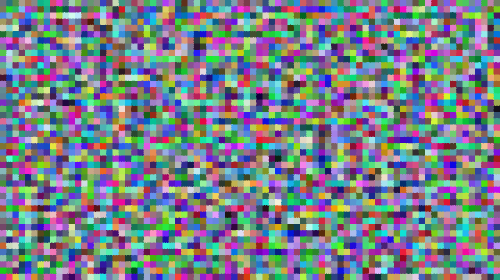

iter: 10, loss: 2.54, losses: 0.937, 0.798, 0.806 (-0=>2.541)
iter: 20, loss: 2.38, losses: 0.887, 0.742, 0.75 (-0=>2.379)


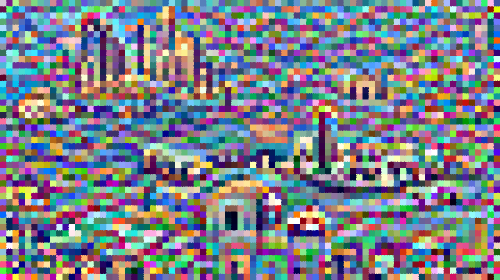

iter: 30, loss: 2.28, losses: 0.856, 0.709, 0.716 (-4=>2.228)
iter: 40, loss: 2.15, losses: 0.799, 0.68, 0.673 (-0=>2.151)


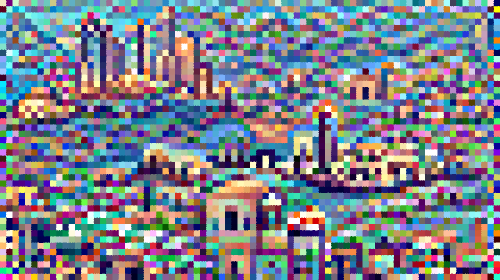

iter: 50, loss: 2.18, losses: 0.816, 0.679, 0.683 (-3=>2.111)
iter: 60, loss: 2.12, losses: 0.796, 0.66, 0.663 (-8=>2.083)


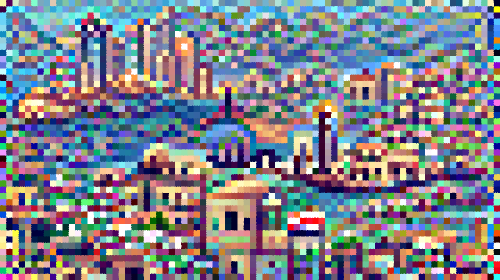

iter: 70, loss: 2.03, losses: 0.747, 0.647, 0.637 (-0=>2.031)
iter: 80, loss: 2.12, losses: 0.786, 0.666, 0.666 (-1=>2.014)


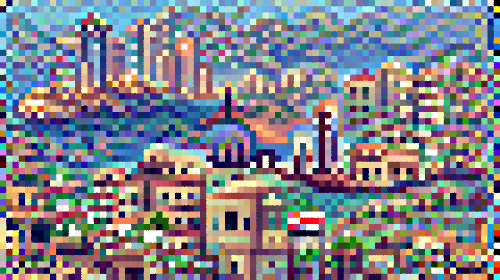

iter: 90, loss: 2.1, losses: 0.776, 0.665, 0.66 (-2=>1.989)
iter: 100, loss: 1.97, losses: 0.717, 0.634, 0.623 (-0=>1.974)


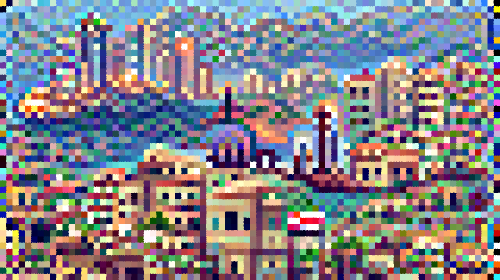

iter: 110, loss: 2.06, losses: 0.754, 0.657, 0.65 (-2=>1.941)
iter: 120, loss: 1.97, losses: 0.718, 0.635, 0.617 (-12=>1.941)


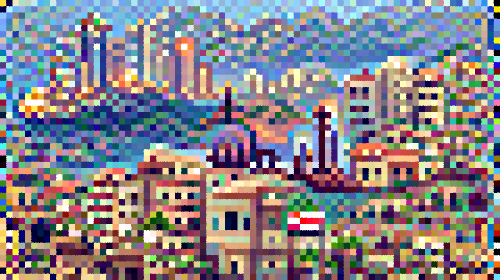

iter: 130, loss: 2.06, losses: 0.758, 0.653, 0.649 (-6=>1.937)
iter: 140, loss: 1.95, losses: 0.71, 0.628, 0.61 (-16=>1.937)


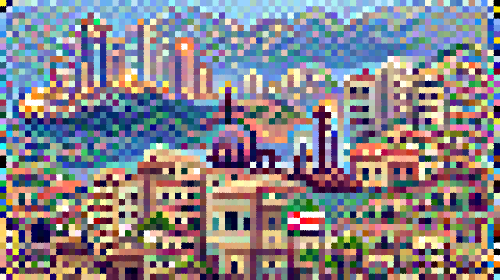

iter: 150, loss: 1.92, losses: 0.695, 0.623, 0.605 (-0=>1.923)
iter: 160, loss: 2.06, losses: 0.759, 0.658, 0.642 (-10=>1.923)


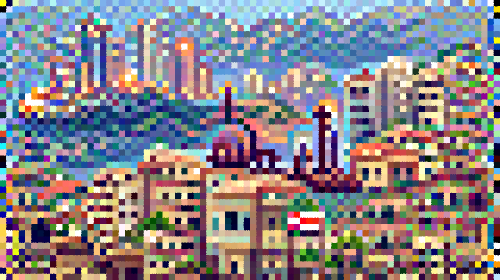

iter: 170, loss: 1.92, losses: 0.7, 0.623, 0.601 (-4=>1.918)
iter: 180, loss: 1.91, losses: 0.692, 0.622, 0.597 (-0=>1.911)


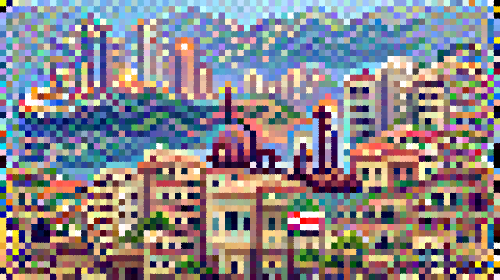

iter: 190, loss: 2.03, losses: 0.739, 0.653, 0.635 (-10=>1.911)
iter: 200, loss: 2, losses: 0.73, 0.643, 0.628 (-6=>1.909)


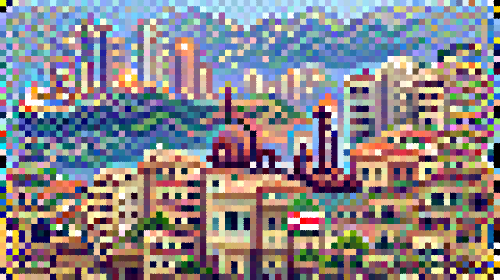

iter: 210, loss: 1.99, losses: 0.728, 0.638, 0.622 (-2=>1.905)
iter: 220, loss: 2.02, losses: 0.74, 0.648, 0.633 (-12=>1.905)


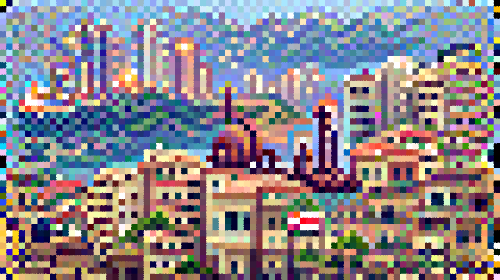

iter: 230, loss: 1.92, losses: 0.702, 0.619, 0.6 (-22=>1.905)
iter: 240, loss: 2.01, losses: 0.736, 0.644, 0.628 (-32=>1.905)


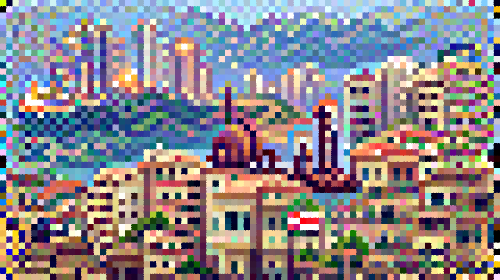

iter: 250, loss: 1.91, losses: 0.693, 0.624, 0.596 (-1=>1.905)
iter: 260, loss: 1.9, losses: 0.685, 0.618, 0.593 (-1=>1.885)


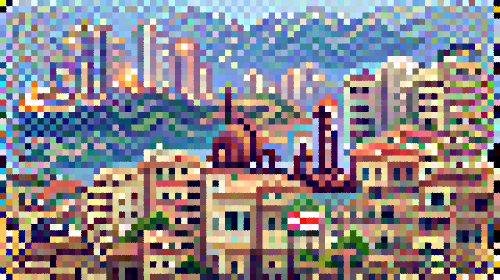

iter: 270, loss: 1.88, losses: 0.678, 0.614, 0.59 (-8=>1.877)
iter: 280, loss: 1.91, losses: 0.693, 0.621, 0.594 (-18=>1.877)


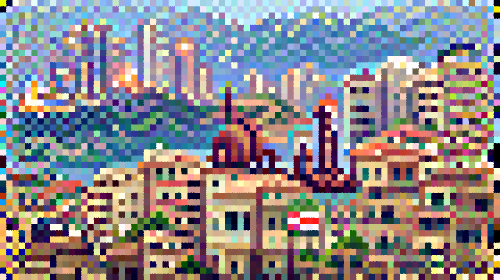

iter: 290, loss: 2.03, losses: 0.74, 0.65, 0.636 (-28=>1.877)
iter: 300, loss: 1.99, losses: 0.726, 0.638, 0.621 (-38=>1.877)


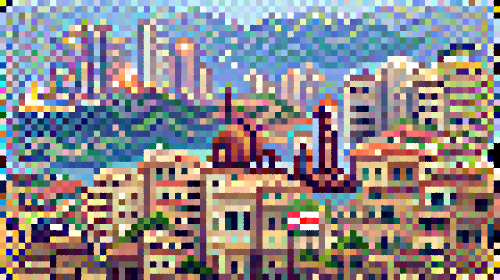

iter: 310, loss: 1.9, losses: 0.688, 0.617, 0.593 (-48=>1.877)
iter: 320, loss: 2.02, losses: 0.743, 0.647, 0.629 (-58=>1.877)


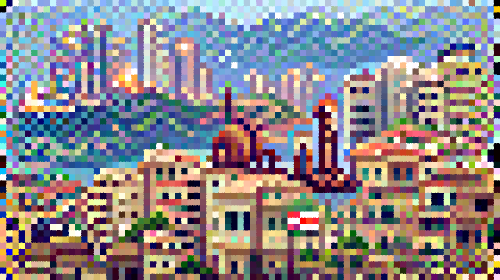

iter: 330, loss: 1.97, losses: 0.719, 0.638, 0.616 (-68=>1.877)
iter: 340, loss: 1.97, losses: 0.722, 0.632, 0.615 (-78=>1.877)


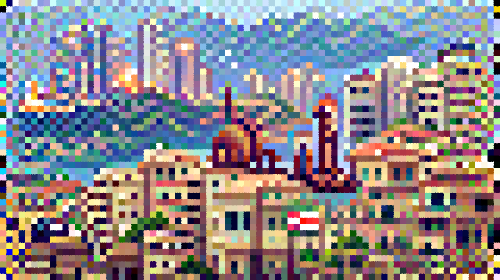

iter: 350, loss: 2.03, losses: 0.744, 0.65, 0.635 (-88=>1.877)
iter: 360, loss: 1.89, losses: 0.684, 0.619, 0.592 (-98=>1.877)


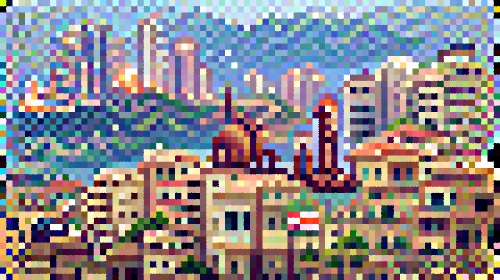

iter: 370, loss: 1.88, losses: 0.679, 0.614, 0.585 (-108=>1.877)
iter: 380, loss: 2, losses: 0.734, 0.642, 0.627 (-118=>1.877)


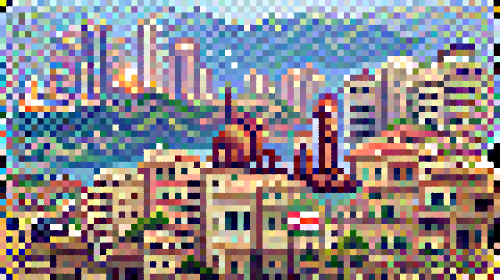

iter: 390, loss: 1.98, losses: 0.723, 0.641, 0.62 (-6=>1.873)
Dropping learning rate
iter: 399, loss: 1.92, losses: 0.696, 0.633, 0.595 (-15=>1.873)
iter: 400, loss: 2.02, losses: 0.735, 0.652, 0.632 (-1=>1.873)


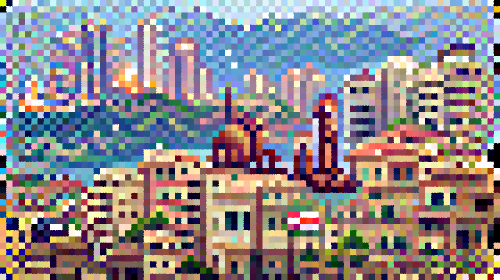

In [3]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown The renderer can also be swapped with other models such
#@markdown as VQGAN or CLIPDraw. <br>

prompts = "Beirut Skyline. #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use = "pixeldraw" #@param ["vqgan", "pixeldraw", "clipdraw"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import pixray

# these are good settings for pixeldraw
pixray.reset_settings()
pixray.add_settings(prompts=prompts, aspect=aspect)
pixray.add_settings(quality="better", scale=2.5)
pixray.add_settings(drawer=use)

#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# pixray.add_settings(iterations=500, display_every=50)

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
